In [7]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [8]:
#data importation
data = pd.read_csv('Similarity_Normalized.csv')
row = set()
data = data.loc[data['n'] == 7.0]
for x in data['File A']:
    row.add(x)
for x in data['File B']:
    row.add(x)
row = list(row)
matrix = np.zeros((98,98))
df = pd.DataFrame(matrix)
df.columns=row
df.index=row

for x in range(len(data)):
    df[data['File A'].iloc[x]][data['File B'].iloc[x]] = data['Similarity'].iloc[x]
    df[data['File B'].iloc[x]][data['File A'].iloc[x]] = data['Similarity'].iloc[x]

In [16]:
#running k means
K = 4
kmeans = KMeans(
init="random",
n_clusters=K,
n_init=10,
max_iter=300,random_state=42)
kmeans.fit(df)
kmeans.labels_

#viewing clusters
clusters = [[] for x in range(K)]
for (x,y) in zip(kmeans.labels_,list(df.index)):
    clusters[x].append(y)
print(clusters)


[['UPenn7', 'UCLA26', 'Georgetown15', 'Mississippi66', 'Santa74', 'American75', 'Indiana69', 'USF51', 'Lehigh96', 'William77', 'UC64', 'Wake73', 'NotreDame57', 'Villanova62', 'BC17', 'Tulane29'], ['Brandeis99', 'Northeastern19', 'Baylor93', 'Cornell5', 'Northwestern25', 'Michigan23', 'UIllinois20', 'Columbia2', 'Penn94', 'Yale4', 'NYU9', 'Auburn71', 'UCSD34', 'UMass92', 'Wisconsin87', 'UConn91', 'UChicago30', 'Oklahoma97', 'Maryland58', 'FSU53', 'BU10', 'Duke14', 'JMU79', 'Virginia63', 'Vanderbilt48', 'Maine59', 'WashU32', 'Rochester38', 'Texas84', 'UC33', 'GWU54', 'UCF52', 'UNC28', 'UF21', 'Rutgers89', 'Tennessee95', 'UGA50', 'Berkeley13', 'MSU24', 'Vermont70', 'Texas80', 'UVA16', 'Temple83', 'USC35', 'Syracuse56'], ['UCSC68', 'Caltech36', 'Simmons81', 'Mich67', 'Hamilton46', 'Amherst41', 'UCSB37', 'Princeton12', 'Bingham82', 'Oberlin44', 'Colgate88', 'Vassar85', 'Williams40', 'Cal65', 'Pepperdine86', 'Rice31', 'Reed98', 'Trinity100', 'Bucknell39', 'UC61', 'USFCA72', 'Harvard1', 'Wesl

4

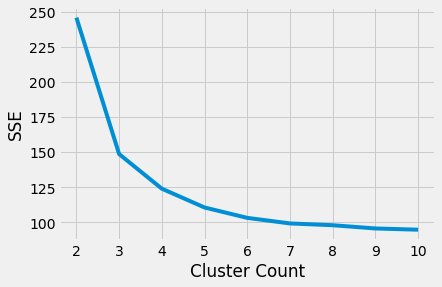

In [14]:
#optimal cluster testing elbow plot
SSE = []
for K in range (2,11):
    kmeans = KMeans(
init="random",
n_clusters=K,
n_init=10,
max_iter=300,random_state=42)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),SSE)
plt.xticks(range(2,11))
plt.xlabel('Cluster Count')
plt.ylabel('SSE')
plt.show
kl = KneeLocator(range(2, 11), SSE, curve="convex", direction="decreasing")
kl.elbow


4

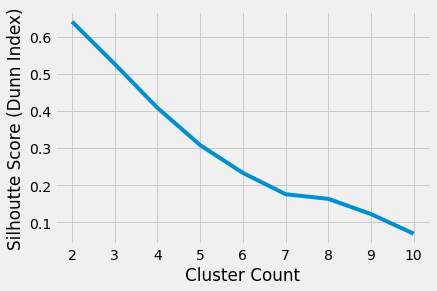

In [15]:
#optimal cluster testing elbow plot
silhoutte = []
for K in range (2,11):
    kmeans = KMeans(
init="random",
n_clusters=K,
n_init=10,
max_iter=300,random_state=42)
    kmeans.fit(df)
    silhoutte.append(silhouette_score(df,kmeans.labels_))
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),silhoutte)
plt.xticks(range(2,11))
plt.xlabel('Cluster Count')
plt.ylabel('Silhoutte Score (Dunn Index)')
plt.show
kl = KneeLocator(range(2, 11), SSE, curve="convex", direction="decreasing")
kl.elbow